In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
h = 128
w = 128
def happiness(b):
    x = np.arange(0, w - 1, 1)
    def f(x):
        return (b*h/2)*np.sin(x*np.pi/w)
    plt.plot(x, f(x), '-')
    

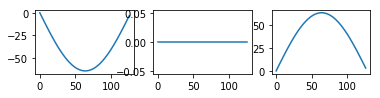

In [32]:
plt.subplot(3, 3, 1)
happiness(-1)
plt.subplot(3, 3, 2)
happiness(0)
plt.subplot(3, 3, 3)
happiness(1)

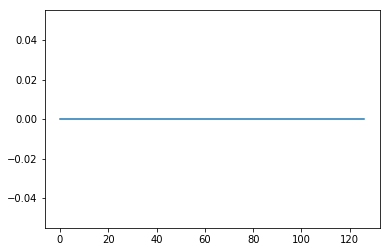

In [10]:
happiness(0)

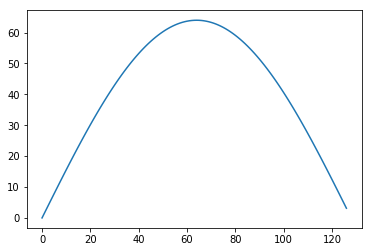

In [12]:
happiness(1)

In [4]:
def happy_circle(v):
    if v == 0:
        v += 0.0001
    r = (w/2)/np.abs(v)
    x = np.arange(0, w, 1)
    d = 0.5*np.sqrt(4*r**2 - (w**2))
    y0 = h/2 + np.sign(v)*d
    x0 = w/2
    y = -np.sign(v)*np.sqrt(r**2 - ((x - x0) **2)) + y0
    plt.xlim(0, w-1)
    plt.ylim(-10, h + 10)
    plt.plot(x, y)

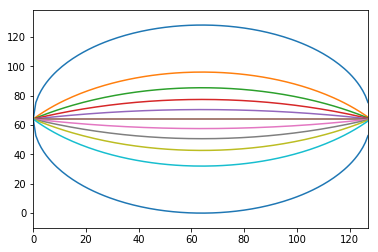

In [188]:
for v in np.arange(-1.0, 1.2, 0.2):
    happy_circle(v)

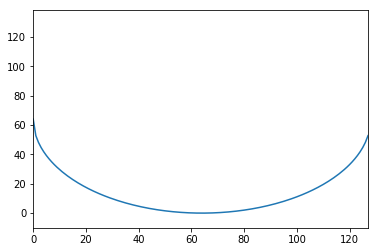

In [189]:
happy_circle(1)

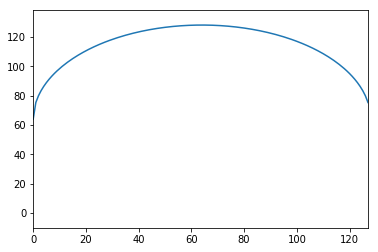

In [190]:
happy_circle(-1)

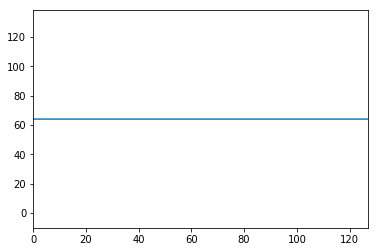

In [191]:
happy_circle(0)

/Users/mgordon/.virtualenv/production/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


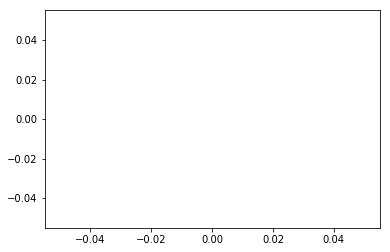

In [44]:
D = 128
v = 2*(np.arange(101)/100 - 0.5)
v[v == 0] = 0.0001
r = D*v/3
x0 = D/2
y0 = D/2
y1 = D/4
y = D/2 - y0  + (y1 - y0)*(v + 1)/2

def h(vv):
    xv = np.arange(D)
    ix = np.abs(xv - x0) <= r[vv]
    yv = np.sqrt((xv - x0)**2 - r[vv]**2) + y[vv]
    plt.plot(xv[ix], yv[ix])
h(0)
    


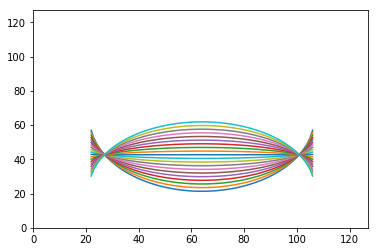

In [99]:
D = 128
def h(v):
    # v = 0 .. 1
    if v == 0:
        v = 0.001
    xv = np.arange(D)
    r = D/3 - 2*v*D/3 # D/3 -> -D/3
    x0 = D/2
    y0 = D/2 - D*v/1.5
    ix = np.abs(xv - x0) <= np.abs(r)
    yv = -np.sqrt(r**2 - (xv[ix] - x0)**2) + y0
    if v > 0.5:
        yv = -yv
    return xv[ix], yv

plt.xlim(0, D-1)
plt.ylim(0, D - 1)
x0, y0 = h(0)
x1, y1 = h(1)
def interp(s0, s1, s):
    return s0 + (s1 - s0)*s

for v in range(20):
    plt.plot(interp(x0, x1, v/20), interp(y0, y1, v/20))


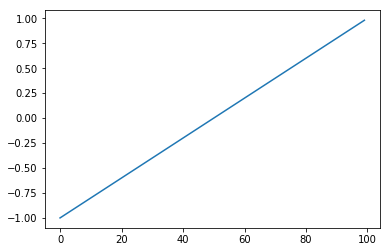

In [93]:
v = np.arange(0, 1, 0.01)
plt.plot(2*v - 1)

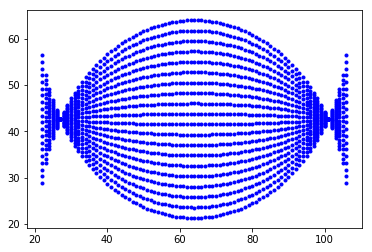

In [111]:
from math import sqrt

def h1(v, D=128):
    d0 = 0.0001
    xv = []
    yv = []
    r = D/3 - 2*v*D/3 # D/3 -> -D/3
    x0 = D/2
    y0 = D/2 - D*v/1.5
    for x in range(128):
        if abs(x - x0) <= abs(r):
            xv.append(x)
            y = -sqrt(r**2 - (x - x0)**2) + y0
            if v > 0.5:
                y = -y
            yv.append(y)
    return xv, yv

x0, y0 = h1(0)
x1, y1 = h1(1)
def interp(s0, s1, s):
    return round(s0 + (s1 - s0)*s)

for j in range(20):
    v = j/19
    for i in range(len(x0)):
        x = x0[i]
        y = y0[i] + (y1[i] - y0[i])*v
        plt.plot(x, y, '.b')

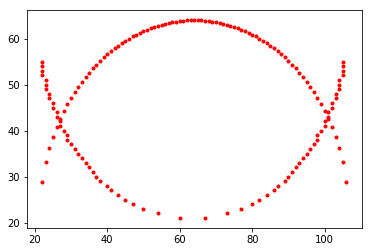

In [125]:
def interpy(v ,i):    
    return round(y0[i] + (y1[i] - y0[i])*v)
v = 0
xv, yv = h1(1)
xv0 = xv.copy()
yv0 = yv.copy()
for i in range(len(x0) - 1):
    x = x0[i]
    y = interpy(v, i)
    y2 =interpy(v, i+1)
    if y > y2:
        t = y2
        y2 = y
        y = t
    for n in range(y, y2):
        xv.append(x)
        yv.append(n)
      
plt.plot(xv, yv, '.r')